In [3]:
import numpy as np 
speed  = [184,85,86,87]

arr1=np.array(speed)
arr1.var()

1801.25

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hb=pd.read_csv("headbrain.csv")
hb.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [10]:
hb.shape

(237, 4)

In [11]:
hb.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [14]:
x=hb.iloc[:,2] #head size
y=hb.iloc[:,3] #brain weight

In [24]:
x_mean=x.mean()
y_mean=y.mean()

#least square method
num = ((x-x_mean)*(y-y_mean)).sum() #numerator
din = ((x-x_mean)**2).sum() #dinominator
m=num/din
m

0.2634293394893993

In [26]:
c=y_mean-m*x_mean
c

325.5734210494428

In [27]:
predicted_y=m*(x)+c
predicted_y

0      1514.166601
1      1310.272292
2      1448.045837
3      1320.546036
4      1425.917772
          ...     
232    1172.235318
233    1219.652599
234    1177.240476
235    1208.588567
236    1218.862311
Name: Head Size(cm^3), Length: 237, dtype: float64

In [28]:
hb['predicted_y']=predicted_y
hb

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams),predicted_y
0,1,1,4512,1530,1514.166601
1,1,1,3738,1297,1310.272292
2,1,1,4261,1335,1448.045837
3,1,1,3777,1282,1320.546036
4,1,1,4177,1590,1425.917772
...,...,...,...,...,...
232,2,2,3214,1110,1172.235318
233,2,2,3394,1215,1219.652599
234,2,2,3233,1104,1177.240476
235,2,2,3352,1170,1208.588567


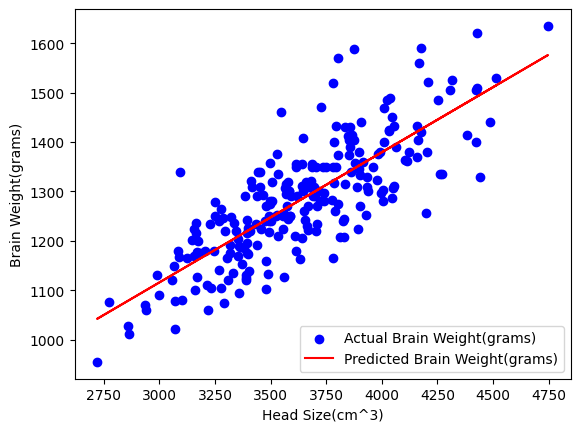

In [76]:
plt.scatter(x,y,c="b",label="Actual Brain Weight(grams)")
plt.plot(x,predicted_y,"r",label="Predicted Brain Weight(grams)")
plt.legend()
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.show()

In [77]:
r2 = 1 - (((hb["Brain Weight(grams)"]-hb["predicted_y"])**2).sum()/((hb["Brain Weight(grams)"]-hb["Brain Weight(grams)"].mean())**2).sum())
r2

0.639311719957

<h1>#from scipy import stats<br>
#slope, intercept, r, p, std_err=stats.linregress(x,y) </h1>

In [71]:
from scipy import stats
slope,intercept,r,p,std_err=stats.linregress(x,y)

In [72]:
r

0.7995697092542964

In [74]:
y_predicted2=slope*(x)+intercept
y_predicted2

0      1514.166601
1      1310.272292
2      1448.045837
3      1320.546036
4      1425.917772
          ...     
232    1172.235318
233    1219.652599
234    1177.240476
235    1208.588567
236    1218.862311
Name: Head Size(cm^3), Length: 237, dtype: float64

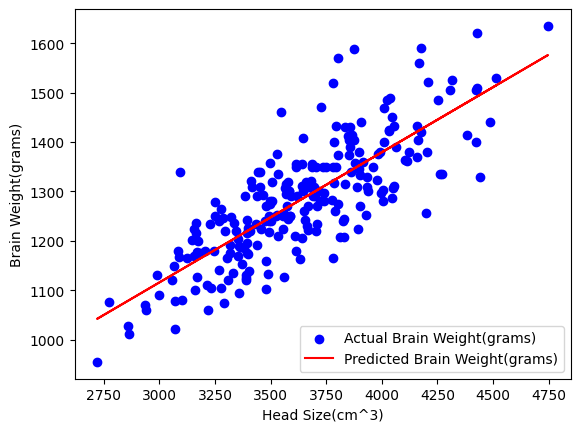

In [75]:
plt.scatter(x,y,c="b",label="Actual Brain Weight(grams)")
plt.plot(x,y_predicted2,"r",label="Predicted Brain Weight(grams)")
plt.legend()
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.show()

In [81]:
from sklearn.metrics import r2_score

In [83]:
r2_score(y,predicted_y) #manual method

0.639311719957

In [84]:
r2_score(y,y_predicted2) #scipy stats linregress

0.639311719957

In [86]:
r**2 #r(pearson correlation coeff) squared = coefficient of determination

0.6393117199570001

In [97]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()

In [98]:
model1

RandomForestRegressor()

In [105]:
model1.fit(x.reshape(-1,1),y)

RandomForestRegressor()

In [108]:
y_predicted3=model1.predict(x.reshape(-1,1))
y_predicted3

array([1494.07857143, 1300.13      , 1391.42      , 1306.22166667,
       1537.35      , 1283.65      , 1380.30333333, 1235.11      ,
       1308.15      , 1358.09      , 1289.91      , 1362.86      ,
       1332.2       , 1476.32      , 1242.62      , 1476.0915    ,
       1304.104     , 1273.14      , 1255.16      , 1434.28333333,
       1403.752     , 1369.7335    , 1408.30833333, 1260.35      ,
       1585.1       , 1483.63333333, 1464.36      , 1459.05      ,
       1310.22      , 1481.25      , 1336.38      , 1396.395     ,
       1365.86      , 1402.15      , 1420.26      , 1274.10416667,
       1334.62      , 1324.74      , 1207.93166667, 1238.11      ,
       1342.83      , 1296.21      , 1503.57      , 1408.30833333,
       1361.8       , 1429.12      , 1496.54      , 1221.97771429,
       1313.37      , 1285.22      , 1258.45333333, 1325.24      ,
       1367.48      , 1391.565     , 1403.8       , 1256.61      ,
       1301.45333333, 1503.43      , 1320.52      , 1249.28   

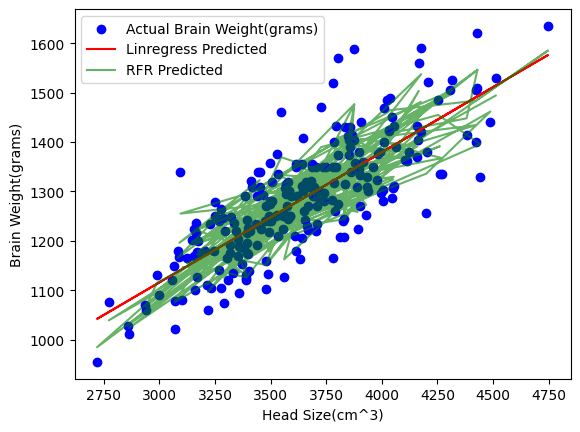

In [110]:
plt.scatter(x,y,c="b",label="Actual Brain Weight(grams)")
plt.plot(x,y_predicted2,"r",label="Linregress Predicted")
plt.plot(x,y_predicted3,"g",label="RFR Predicted",alpha=0.6)
plt.legend()
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.show()

In [111]:
r2_score(y,y_predicted3)

0.8997513159676505

<h1>Polynomial Regression<br>
predicted_y=np.poly1d(np.polyfit(x,y,4)) #4->degreee</h1>

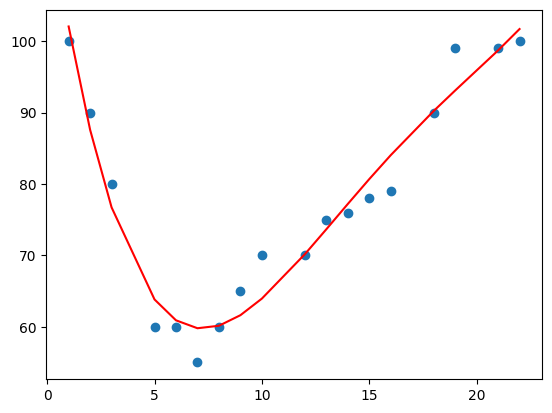

In [119]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
y_pred = numpy.poly1d(numpy.polyfit(x, y, 4))
plt.scatter(x, y)
plt.plot(x, y_pred(x),"r")
plt.show()

In [120]:
r2_score(y,y_pred(x))

0.9542030834699506

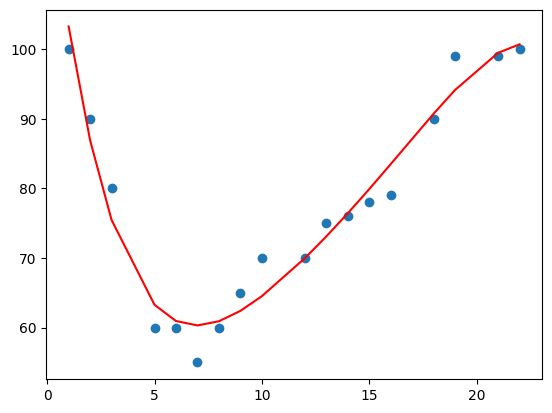

In [124]:
y_pred2 = numpy.poly1d(numpy.polyfit(x, y, 5)) #increase degree+1
y_predicted5=y_pred2(x)
plt.scatter(x, y)
plt.plot(x, y_predicted5,"r")
plt.show()

In [125]:
r2_score(y,y_predicted5)

0.9568460139893519

In [126]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2

LinearRegression()

In [134]:
x=np.array(x).reshape(-1,1)
model2.fit(x,y)

LinearRegression()

In [138]:
y_predicted6=model2.predict(x)

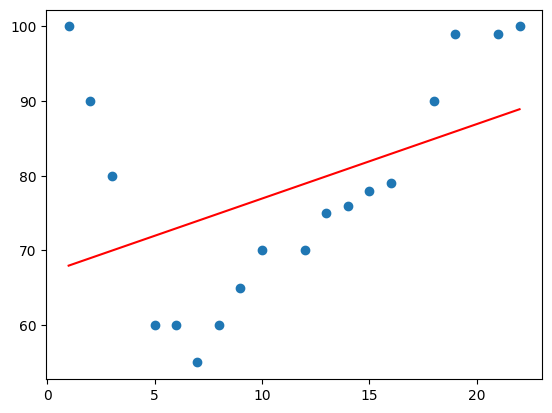

In [139]:
plt.scatter(x, y)
plt.plot(x, y_predicted6,"r")
plt.show()

In [144]:
r2_score(y,y_predicted6)

0.18231625879420676

In [141]:
model3=RandomForestRegressor()
model3.fit(x,y)

RandomForestRegressor()

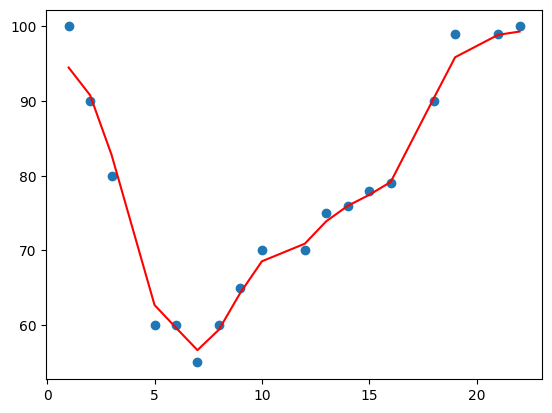

In [143]:
y_predicted7=model3.predict(x)
plt.scatter(x, y)
plt.plot(x, y_predicted7,"r")
plt.show()

In [145]:
r2_score(y,y_predicted7)

0.9837047240332734

<h1>Multiple Regression
<br>from sklearn.model_selection import train_test_split<br>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =18)</h1>

In [146]:
from sklearn.model_selection import train_test_split

In [150]:
start=pd.read_csv("50_startups.csv")
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [161]:
x=start.iloc[:,:-1]
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [162]:
x.iloc[:,-1].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [168]:
x_ready=pd.get_dummies(x,columns=["State"]).astype("int64")
x_ready.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349,136897,471784,0,0,1
1,162597,151377,443898,1,0,0
2,153441,101145,407934,0,1,0
3,144372,118671,383199,0,0,1
4,142107,91391,366168,0,1,0


In [166]:
y=start.iloc[:,-1]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x_ready,y,test_size=0.3,random_state=4)

In [174]:
model4=RandomForestRegressor()
model4

RandomForestRegressor()

In [175]:
model4.fit(x_train,y_train)

RandomForestRegressor()

In [176]:
y_predicted8=model4.predict(x_test)

In [184]:
r2_score(y_test,y_predicted8)

0.9274694603482945

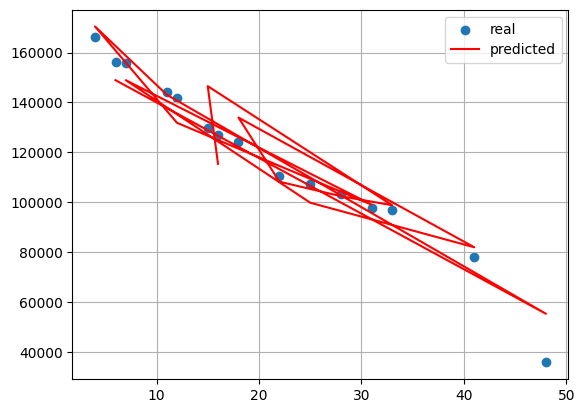

In [195]:
plt.scatter(y_test.index,y_test,label="real")
plt.plot(y_test.index,y_predicted8,"r",label="predicted")
plt.legend()
plt.grid(True)
plt.show()